In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import env

from acquire import telco_cust
from acquire import telco_cust1



df = telco_cust()
df.to_csv('telco_churn.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

# Exploration

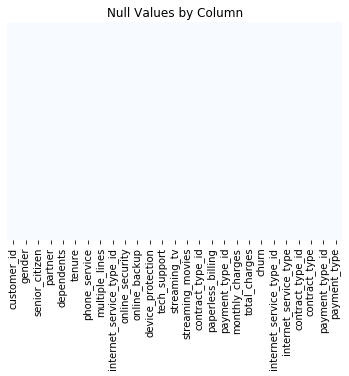

In [2]:
#looking for na and null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')
plt.title('Null Values by Column')
plt.show()

In [3]:
df.isna().sum()

customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
internet_service_type_id    0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
contract_type_id            0
paperless_billing           0
payment_type_id             0
monthly_charges             0
total_charges               0
churn                       0
internet_service_type_id    0
internet_service_type       0
contract_type_id            0
contract_type               0
payment_type_id             0
payment_type                0
dtype: int64

In [4]:
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,internet_service_type_id,contract_type_id,payment_type_id
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,1.872923,1.690473,2.315633
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047,0.737796,0.833755,1.148907
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,1.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,1.000000,1.000000,1.000000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,2.000000,1.000000,2.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,2.000000,2.000000,3.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,3.000000,3.000000,4.000000


In [5]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,internet_service_type_id,internet_service_type,contract_type_id,contract_type,payment_type_id,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.9,542.4,No,1,DSL,1,Month-to-month,2,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,4,69.4,571.45,No,1,DSL,1,Month-to-month,4,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,1,48.2,340.35,No,1,DSL,1,Month-to-month,1,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,1,25.1,25.1,Yes,1,DSL,1,Month-to-month,1,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,3,30.5,30.5,Yes,1,DSL,1,Month-to-month,3,Bank transfer (automatic)


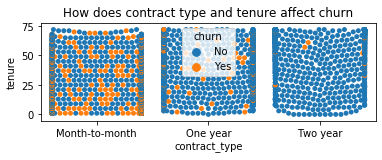

In [6]:
#swarmplot
plt.subplot(211)
sns.swarmplot(x='contract_type', y='tenure', data=df, hue='churn')
plt.title('How does contract type and tenure affect churn')
plt.show()

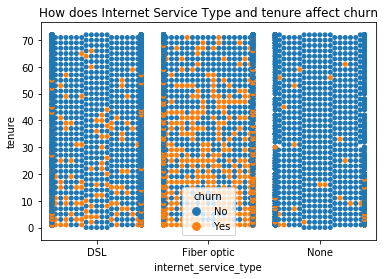

In [7]:
sns.swarmplot(x='internet_service_type', y='tenure', data=df, hue='churn')
plt.title('How does Internet Service Type and tenure affect churn')
plt.show()


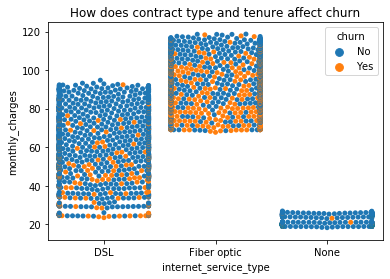

In [8]:
sns.swarmplot(x='internet_service_type', y='monthly_charges', data=df, hue='churn')
plt.title('How does contract type and tenure affect churn')
plt.show()

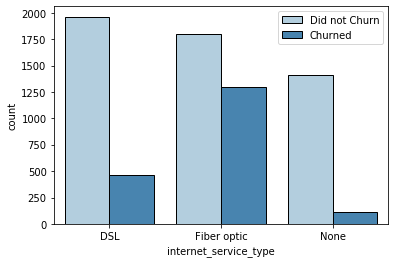

In [9]:
sns.countplot(x = 'internet_service_type', hue = 'churn', data=df, palette='Blues', ec='black', linewidth=1)

plt.legend(['Did not Churn', 'Churned'])

plt.show()

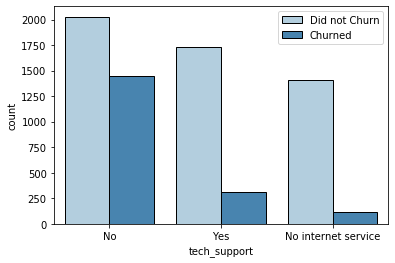

In [10]:
sns.countplot(x = 'tech_support', hue = 'churn', data=df, palette='Blues', ec='black', linewidth=1)

plt.legend(['Did not Churn', 'Churned'])

plt.show()

Text(33.0, 0.5, '')

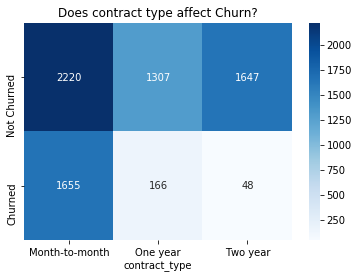

In [12]:
crosstab = pd.crosstab(df.churn, df['contract_type'])
sns.heatmap(crosstab, annot= True, cmap= 'Blues', fmt= 'd')

plt.title('Does contract type affect Churn?')
locs, labels = plt.yticks()
plt.yticks(locs, ('Not Churned', 'Churned'))
plt.ylabel('')

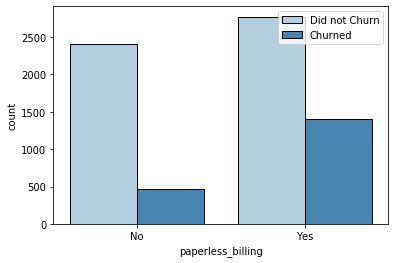

In [13]:
sns.countplot(x = 'paperless_billing', hue = 'churn', data=df, palette='Blues', ec='black', linewidth=1)

plt.legend(['Did not Churn', 'Churned'])

plt.show()

Text(33.0, 0.5, '')

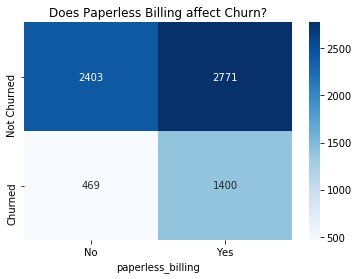

In [15]:
crosstab = pd.crosstab(df.churn, df['paperless_billing'])
sns.heatmap(crosstab, annot= True, cmap= 'Blues', fmt= 'd')

plt.title('Does Paperless Billing affect Churn?')
locs, labels = plt.yticks()
plt.yticks(locs, ('Not Churned', 'Churned'))
plt.ylabel('')

# Hypothesis 1: Is Tech support a factor for churn?

Null Hypothesis: Tech support is not a factor in churn

Alternative Hypothesis: Tech support is a factor in churn

In [16]:
# We will go with a 95% confidence level which makes our alpha .05
alpha = .05

ctab = pd.crosstab(df.tech_support, df.churn)
ctab

churn,No,Yes
tech_support,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


In [17]:
ctab.values

array([[2027, 1446],
       [1413,  113],
       [1734,  310]])

In [18]:
#Time to import some stats
from scipy import stats
from scipy.stats import chi2_contingency

chi2, p, degf, expected = stats.chi2_contingency(ctab)
print('Our p-value is:', p, '\n')
if p < alpha:
    print('p-value is less than the alpha, therefore we reject the null hypothesis')
else:
    print('p-value is greater than the alpha, therefore we cannot reject the null hypothesis')
    
chi2

Our p-value is: 1.4430840279998987e-180 

p-value is less than the alpha, therefore we reject the null hypothesis


828.1970684587394

# Hypothesis 2: Do fiber optic customers have a high rate of Churn?

Null Hypothesis: There is no correlation between fiber customers and those who churn.

Alternative Hypothesis: There is a correlation between fiber customers and those who churn.

In [19]:
a = .05
ctab1 = pd.crosstab(df.churn, (df['internet_service_type'] == 'Fiber optic'))
chi2, p, degf, expected = stats.chi2_contingency(ctab1)
ctab1.values

array([[3375, 1799],
       [ 572, 1297]])

In [20]:
print('Our p-value is:', p, '\n')
if p < alpha:
    print('p-value is less than the alpha, therefore we reject the null hypothesis')
else:
    print('p-value is greater than the alpha, therefore we cannot reject the null hypothesis')
    

Our p-value is: 4.940476033744708e-147 

p-value is less than the alpha, therefore we reject the null hypothesis


In [21]:
#drop columns
df = df.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

In [22]:
#Replacing yes and no's with 1 and 0's
df.partner.replace(['Yes', 'No'], [1,0], inplace=True)
df.dependents.replace(['Yes', 'No'], [1,0], inplace=True)
df.phone_service.replace(['Yes', 'No'], [1,0], inplace=True)
df.multiple_lines.replace(['Yes', 'No'], [1,0], inplace=True)
df.online_security.replace(['Yes', 'No'], [1,0], inplace=True)
df.online_backup.replace(['Yes', 'No'], [1,0], inplace=True)
df.tech_support.replace(['Yes', 'No'], [1,0], inplace=True)
df.streaming_tv.replace(['Yes', 'No'], [1,0], inplace=True)
df.streaming_movies.replace(['Yes', 'No'], [1,0], inplace=True)
df.paperless_billing.replace(['Yes', 'No'], [1,0], inplace=True)
df.device_protection.replace(['Yes', 'No'], [1,0], inplace=True)
df.churn.replace(['Yes', 'No'], [1,0], inplace=True)

In [23]:
#Importing train, test, split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [24]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.churn)

train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate.churn)

print(f'train    -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test     -> {test.shape}')

train    -> (3943, 21)
validate -> (1691, 21)
test     -> (1409, 21)


In [25]:
train.head(1)

plt.rc('figure', figsize=(11,9))
plt.rc('font', size=13)

# Getting the Baseline

In [26]:
#Baseline
train.churn.value_counts(normalize=True)

0    0.73472
1    0.26528
Name: churn, dtype: float64

In [27]:
train.head(10)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
5710,6013-BHCAW,Male,0,1,1,61,1,1,0,0,...,1,1,1,1,81.00,4976.15,0,DSL,Two year,Bank transfer (automatic)
4465,0409-WTMPL,Female,0,1,0,58,1,1,1,1,...,0,1,1,1,110.65,6526.65,0,Fiber optic,One year,Credit card (automatic)
5017,1085-LDWAM,Female,0,1,1,69,1,0,No internet service,No internet service,...,No internet service,No internet service,No internet service,1,20.35,1442.65,0,None,One year,Credit card (automatic)
3521,3039-MJSLN,Male,0,0,1,3,1,0,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,20.20,50.6,0,None,Month-to-month,Bank transfer (automatic)
3828,9046-JBFWA,Male,0,0,1,27,1,0,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,19.15,537.35,0,None,Month-to-month,Mailed check
4173,5203-XEHAX,Female,0,0,0,34,1,0,1,1,...,0,0,1,0,64.35,2053.05,0,DSL,One year,Electronic check
2660,6615-NGGZJ,Male,0,0,0,14,1,1,0,1,...,0,1,1,1,100.55,1415.55,1,Fiber optic,Month-to-month,Electronic check
1866,3005-TYFRD,Female,0,1,0,55,1,1,0,1,...,0,1,1,1,103.65,5676.65,0,Fiber optic,Month-to-month,Credit card (automatic)
1414,0895-DQHEW,Male,0,1,0,54,1,1,0,1,...,0,1,1,1,104.30,5278.15,1,Fiber optic,Month-to-month,Electronic check
1384,0701-RFGFI,Female,0,1,1,49,1,1,0,0,...,0,1,1,1,95.40,4613.95,0,Fiber optic,Month-to-month,Bank transfer (automatic)


# Dropping Columns

In [28]:
X_train = train.drop(columns=['customer_id', 'gender', 'online_security', 'multiple_lines',
                              'online_backup', 'tech_support', 'streaming_tv', 'churn',
                              'streaming_movies', 'internet_service_type','total_charges',
                              'contract_type', 'payment_type', 'device_protection'])
y_train = train[['churn']]

X_validate = validate.drop(columns=['customer_id', 'gender', 'online_security','multiple_lines',
                              'online_backup', 'tech_support', 'streaming_tv','churn',
                              'streaming_movies', 'internet_service_type','total_charges',
                              'contract_type', 'payment_type', 'device_protection'])
y_validate = validate[['churn']]

X_test = test.drop(columns=['customer_id', 'gender', 'online_security','multiple_lines',
                              'online_backup', 'tech_support', 'streaming_tv','churn',
                              'streaming_movies', 'internet_service_type','total_charges',
                              'contract_type', 'payment_type', 'device_protection'])
y_test = test[['churn']]

In [29]:
X_train.head(1)

,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges
5710,0,1,1,61,1,1,81.0


In [30]:
y_train.head()

,churn
5710,0
4465,0
5017,0
3521,0
3828,0


# Logistic Regression

In [38]:
# Time for some logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix

logit = LogisticRegression(random_state = 123)
logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)
y_pred_probab = logit.predict_proba(X_train)

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[2644  253]
 [ 566  480]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      2897
           1       0.65      0.46      0.54      1046

    accuracy                           0.79      3943
   macro avg       0.74      0.69      0.70      3943
weighted avg       0.78      0.79      0.78      3943



In [39]:
#Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [40]:
print(f'Columns used: {X_train.columns}\n')
print(f' Coefficient: {logit.coef_}\n')
print(f'   Intercept: {logit.intercept_}\n')

Columns used: Index(['senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service',
       'paperless_billing', 'monthly_charges'],
      dtype='object')

 Coefficient: [[ 0.5573406   0.16035009 -0.39608126 -0.05520616 -0.93485859  0.50054653
   0.03143833]]

   Intercept: [-1.25637633]



In [35]:
logit.score(X_train, y_train)

0.7922901344154197

# Decision Tree

In [41]:
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=10, random_state = 123)
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [42]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [43]:
y_pred1 = dtc.predict(X_train)
y_pred_proba1 = dtc.predict_proba(X_train)

print(confusion_matrix(y_train, y_pred1))
print(classification_report(y_train, y_pred1))

[[2718  179]
 [ 350  696]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2897
           1       0.80      0.67      0.72      1046

    accuracy                           0.87      3943
   macro avg       0.84      0.80      0.82      3943
weighted avg       0.86      0.87      0.86      3943



# Random Forest

In [44]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5)
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
rf.fit(X_train, y_train)

y_pred2 = rf.predict(X_train)
y_pred_proba2 = rf.predict_proba(X_train)

print(confusion_matrix(y_train, y_pred2))
print(classification_report(y_train, y_pred2))

[[2738  159]
 [ 632  414]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2897
           1       0.72      0.40      0.51      1046

    accuracy                           0.80      3943
   macro avg       0.77      0.67      0.69      3943
weighted avg       0.79      0.80      0.78      3943



In [46]:
rf.score(X_train, y_train)

0.7993913264012174

# KNN

In [47]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
knn.fit(X_train, y_train)

y_pred3 = knn.predict(X_train)
y_pred_proba3 = knn.predict_proba(X_train)

print(confusion_matrix(y_train, y_pred3))
print(classification_report(y_train, y_pred3))

[[2700  197]
 [ 429  617]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2897
           1       0.76      0.59      0.66      1046

    accuracy                           0.84      3943
   macro avg       0.81      0.76      0.78      3943
weighted avg       0.84      0.84      0.83      3943



In [49]:
knn.score(X_train, y_train)

0.8412376363175247

In [50]:
print('Logistic Regression:', logit.score(X_train, y_train),'\n')
print('Decision Tree      :',dtc.score(X_train, y_train),'\n')
print('Knn                :', knn.score(X_train, y_train),'\n')
print('Random Forest      :', rf.score(X_train, y_train))

Logistic Regression: 0.7922901344154197 

Decision Tree      : 0.8658381942683236 

Knn                : 0.8412376363175247 

Random Forest      : 0.7993913264012174


# Time to Validate

In [54]:
##### Validate Decision Tree #####
dtcv = DecisionTreeClassifier(max_depth=10, random_state = 123)
dtcv.fit(X_validate, y_validate)
y_pred1 = dtcv.predict(X_validate)

print(confusion_matrix(y_validate, y_pred1))
print(classification_report(y_validate, y_pred1))

[[1168   74]
 [  74  375]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1242
           1       0.84      0.84      0.84       449

    accuracy                           0.91      1691
   macro avg       0.89      0.89      0.89      1691
weighted avg       0.91      0.91      0.91      1691



In [57]:
##### KNN #####
knnv = KNeighborsClassifier()
knnv.fit(X_validate, y_validate)

y_pred3 = knnv.predict(X_validate)


print(confusion_matrix(y_validate, y_pred3))
print(classification_report(y_validate, y_pred3))

[[1145   97]
 [ 185  264]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1242
           1       0.73      0.59      0.65       449

    accuracy                           0.83      1691
   macro avg       0.80      0.75      0.77      1691
weighted avg       0.83      0.83      0.83      1691



In [58]:
print('Decision Tree Accuracy:', dtcv.score(X_validate, y_validate), '\n')
print('KNN Accuracy          :', knnv.score(X_validate, y_validate), '\n')

Decision Tree Accuracy: 0.9124778237729154 

KNN Accuracy          : 0.8332347723240686 



# Test

In [61]:
##### TEST #####
dtct = DecisionTreeClassifier(max_depth=10, random_state = 123)
dtct.fit(X_test, y_test)
y_pred1 = dtct.predict(X_test)

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[1010   25]
 [  91  283]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1035
           1       0.92      0.76      0.83       374

    accuracy                           0.92      1409
   macro avg       0.92      0.87      0.89      1409
weighted avg       0.92      0.92      0.91      1409



In [62]:
print('Decision Tree Accuracy is:', dtct.score(X_test, y_test))

Decision Tree Accuracy is: 0.9176721078779276


# Creating a CSV

In [ ]:
X_train.head(1)

In [ ]:
z = df[['senior_citizen', 'partner', 'dependents',
        'tenure', 'phone_service', 'paperless_billing', 'monthly_charges']]
df['churn_prediction'] = dtc.predict(z)
df.head()

In [ ]:
prob_df = pd.DataFrame(dtc.predict_proba(z))
prob_df.head()
#dropping the zero column
prob_df = prob_df.drop(0,axis=1)
prob_df.head()

In [ ]:
df = pd.concat([df,prob_df], axis=1)
df = df.rename(columns={1:'churn_probability'})

In [ ]:
df.head(10)

In [ ]:
df[['customer_id', 'churn_prediction', 'churn_probability']].to_csv('telco_predictions.csv')

# In Summary

Contract types have the highest churn rate

Recommendations 

Create and implement a loyalty rewards program

Provide rewards for month to month contract longevity